Predicting Diabetes Risk Based on Health Data

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,age,sex,bmi,glucose levels,aiding early diagnosis,intervention,Outcome
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0


In [5]:
print(df.info())
print(df.describe())
cols_with_zero = ['bmi']  # Removed 's3' as it does not exist in the dataframe
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
df.fillna(df.median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     442 non-null    float64
 1   sex                     442 non-null    float64
 2   bmi                     442 non-null    float64
 3   glucose levels          442 non-null    float64
 4   aiding early diagnosis  442 non-null    float64
 5   intervention            442 non-null    float64
 6   Outcome                 442 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 24.3 KB
None
                age           sex           bmi  glucose levels  \
count  4.420000e+02  4.420000e+02  4.420000e+02    4.420000e+02   
mean  -4.524887e-12 -1.402715e-10  1.131222e-11   -1.447964e-10   
std    4.761905e-02  4.761905e-02  4.761905e-02    4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02   -1.123988e-01   
25%   -3.729927e-02 -4.46416

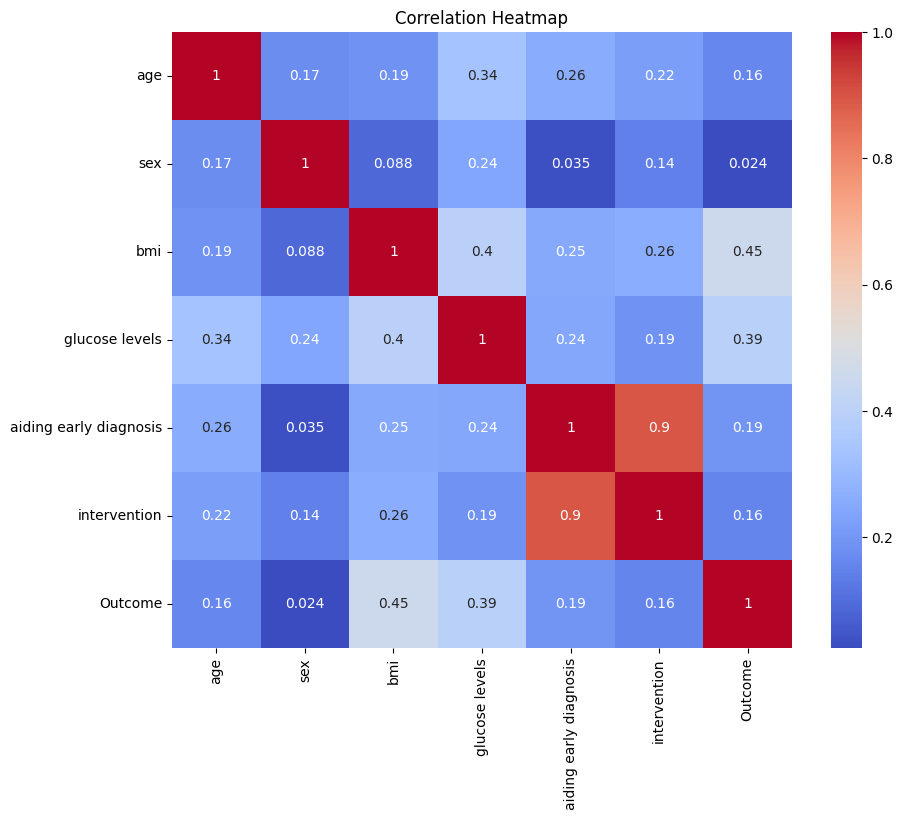

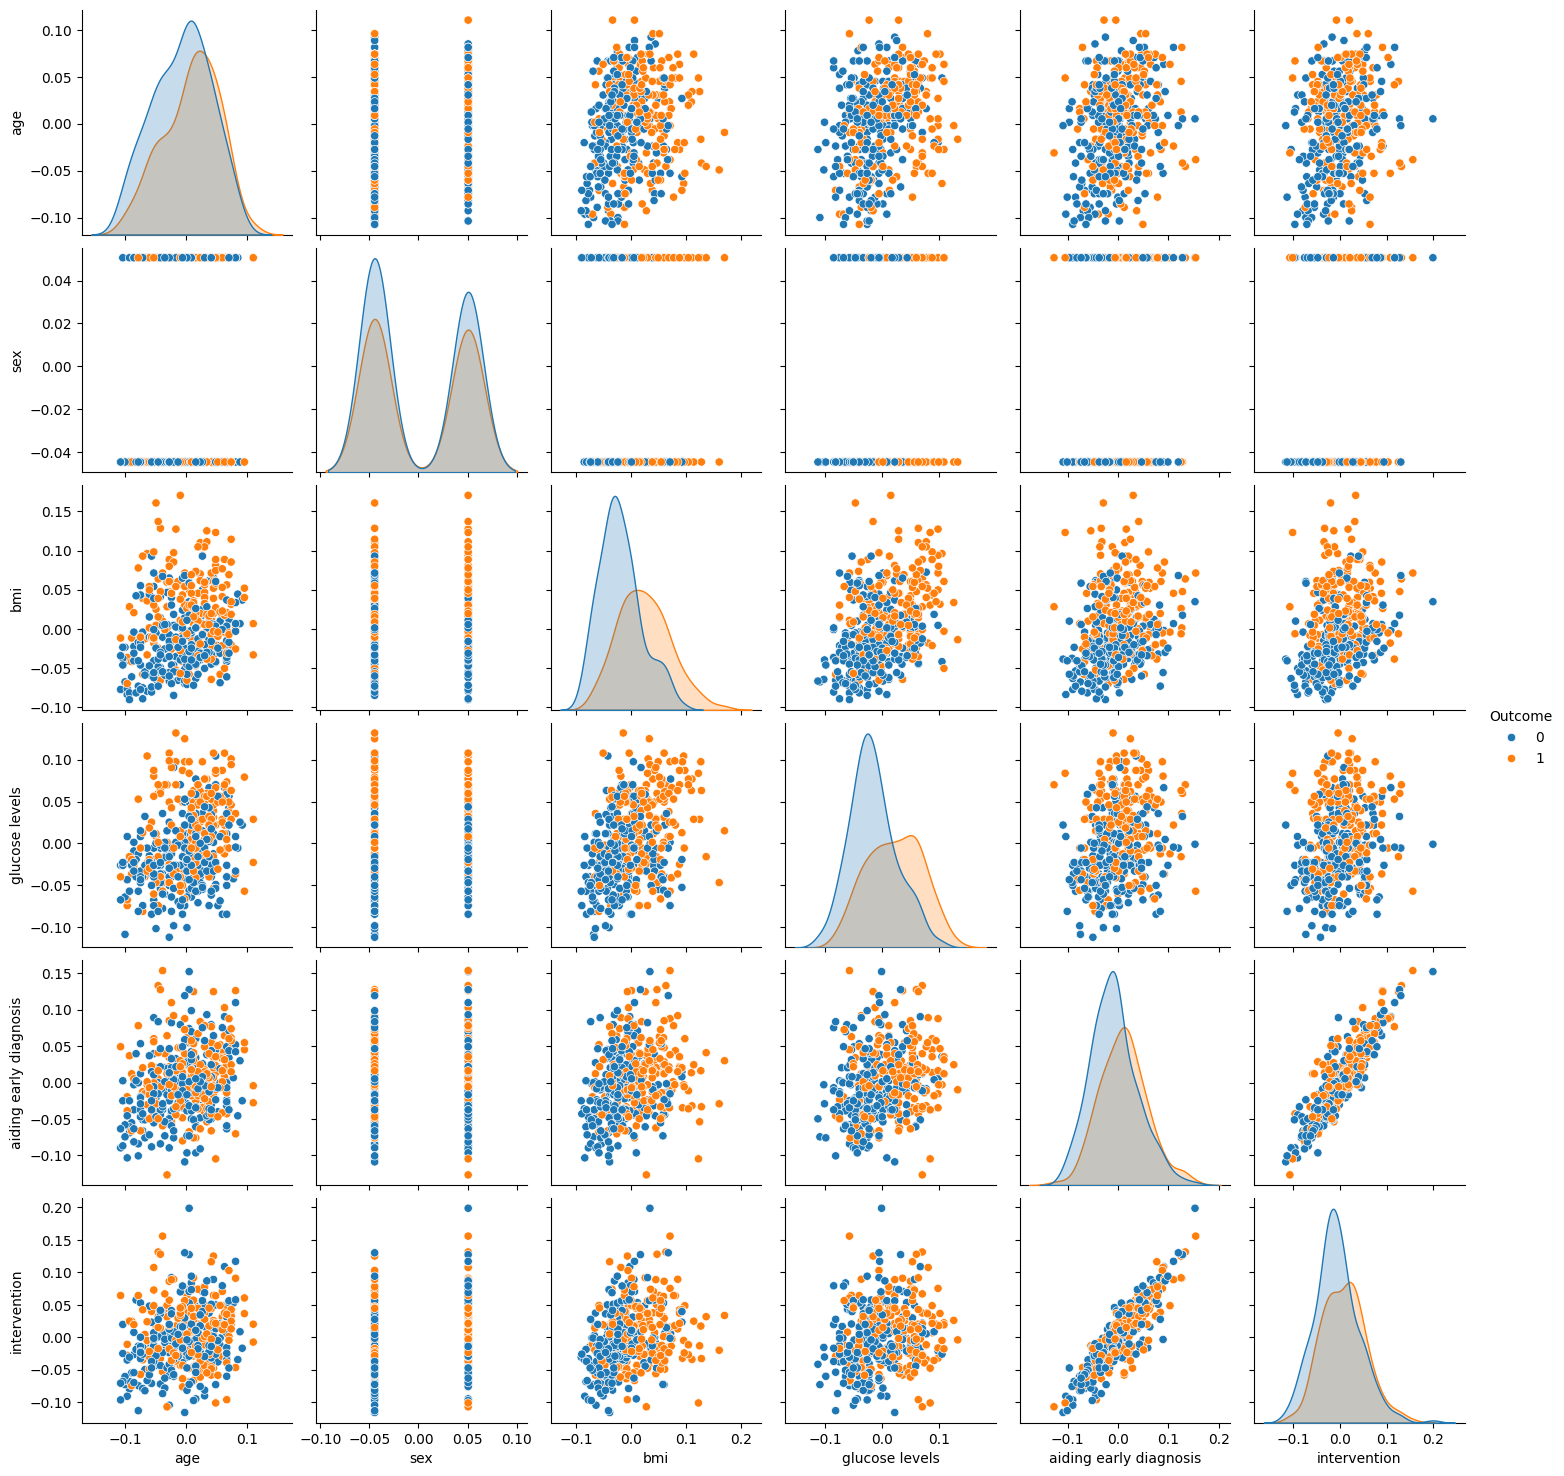

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
sns.pairplot(df, hue="Outcome")


In [7]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [11]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Logistic Regression Accuracy: 0.6966292134831461
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        50
           1       0.70      0.54      0.61        39

    accuracy                           0.70        89
   macro avg       0.70      0.68      0.68        89
weighted avg       0.70      0.70      0.69        89

Random Forest Accuracy: 0.7303370786516854
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        50
           1       0.76      0.56      0.65        39

    accuracy                           0.73        89
   macro avg       0.74      0.71      0.71        89
weighted avg       0.74      0.73      0.72        89



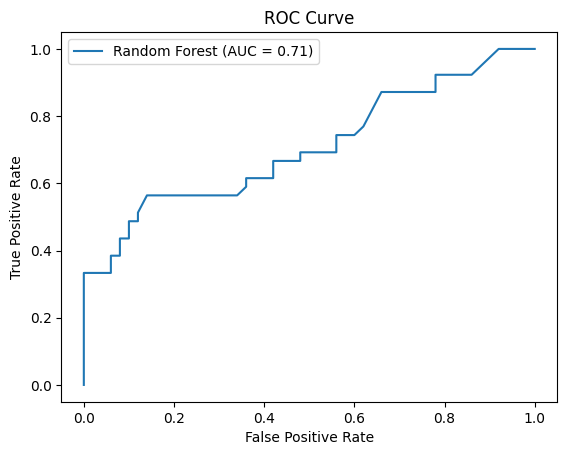

In [12]:
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(fpr, tpr, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, rf_probs)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [13]:
def health_tips(age, bmi, glucose):
    tips = []
    if age > 45: tips.append("Age is a factor. Regular screening is advised.")
    if bmi > 25: tips.append("High BMI. Exercise and healthy diet recommended.")
    if glucose > 140: tips.append("High glucose. Consult a doctor.")
    return tips

#example
print(health_tips(age=50, bmi=30, glucose=160))

['Age is a factor. Regular screening is advised.', 'High BMI. Exercise and healthy diet recommended.', 'High glucose. Consult a doctor.']
